# Building a CNN using Keras : Dataset - MNIST Fashion                                         

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Preparation

In [6]:
x = pd.read_csv("fashion-mnist_test.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [7]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

In [8]:
print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


# CNN Model

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation="relu"))
model.add(Convolution2D(8,(5,5),activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [10]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 10s 1ms/step - loss: 1.5498 - accuracy: 0.4252 - val_loss: 0.9061 - val_accuracy: 0.6835
Epoch 2/20
8000/8000 [==============================] - 10s 1ms/step - loss: 0.7957 - accuracy: 0.7076 - val_loss: 0.7320 - val_accuracy: 0.7350
Epoch 3/20
8000/8000 [==============================] - 10s 1ms/step - loss: 0.6592 - accuracy: 0.7504 - val_loss: 0.6319 - val_accuracy: 0.7725
Epoch 4/20
8000/8000 [==============================] - 10s 1ms/step - loss: 0.5775 - accuracy: 0.7835 - val_loss: 0.5663 - val_accuracy: 0.7910
Epoch 5/20
8000/8000 [==============================] - 11s 1ms/step - loss: 0.5196 - accuracy: 0.8076 - val_loss: 0.5286 - val_accuracy: 0.8220
Epoch 6/20
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4862 - accuracy: 0.8238 - val_loss: 0.4998 - val_accuracy: 0.8295
Epoch 7/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4388

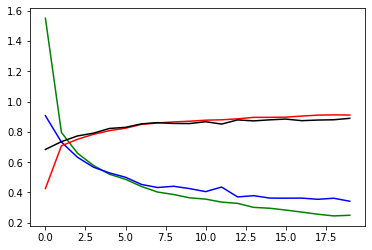

In [13]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')


plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()